Algorithm 4: Random Forest

In [1]:
%pip install pandas scikit-learn matplotlib joblib seaborn

Note: you may need to restart the kernel to use updated packages.


Import the required modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset

In [3]:
df = pd.read_csv("cleaned_early_pd_dataset.csv")

In [4]:
df = df.drop(columns=['patient_id', 'visit_id', 'visit_month'])

In [5]:
X = df.drop(columns=['label'])
X = X[[col for col in X.columns if not col.endswith('_was_imputed')]]
y = df['label']

Split the training and testing data and train the model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf = RandomForestClassifier(random_state=42)

Hyperparameter tuning using GridSearchCV

In [8]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [9]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [10]:
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:\n", grid_search.best_params_)

Best Hyperparameters:
 {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [11]:
cv_scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validation Accuracy: 0.9626 ± 0.0172


Predict the value of testing sample

In [12]:
y_pred = best_rf.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.9532710280373832
Confusion Matrix:
 [[ 76   9]
 [  1 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94        85
           1       0.93      0.99      0.96       129

    accuracy                           0.95       214
   macro avg       0.96      0.94      0.95       214
weighted avg       0.96      0.95      0.95       214



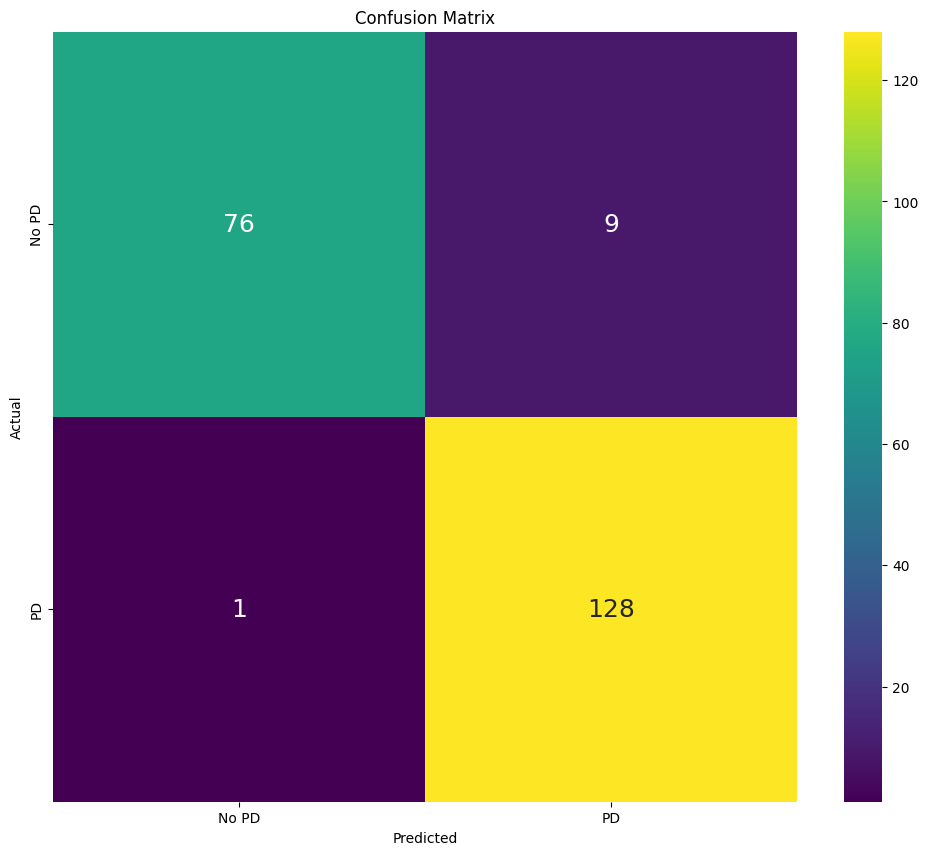

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,annot_kws={"size": 18}, fmt='d', cmap='viridis', xticklabels=['No PD', 'PD'], yticklabels=['No PD', 'PD'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Determine feature importances

In [14]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-10:][::-1]

Visualize the important features

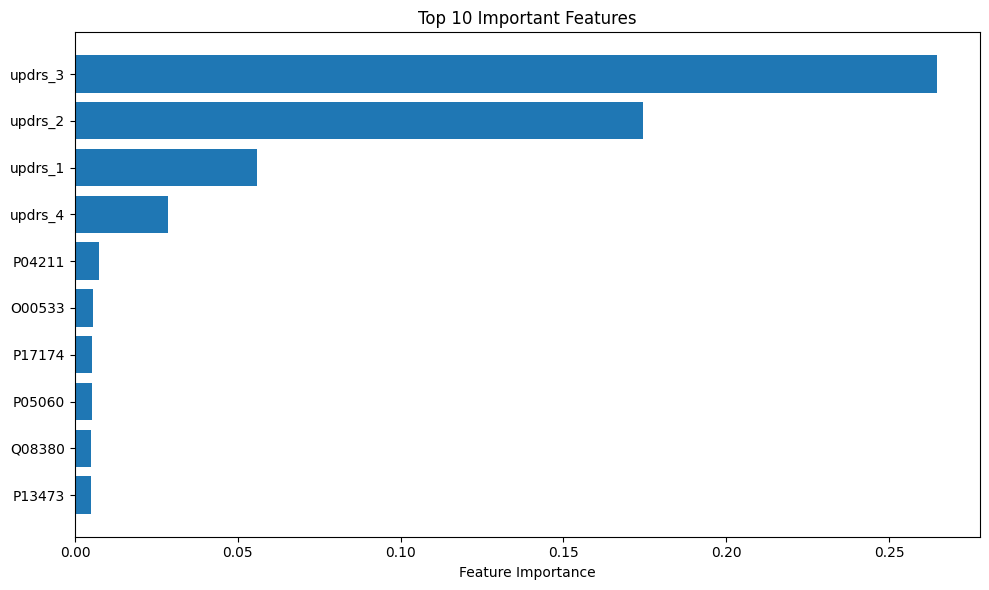

In [15]:
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
